In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

shape of test: 
(7352, 128)


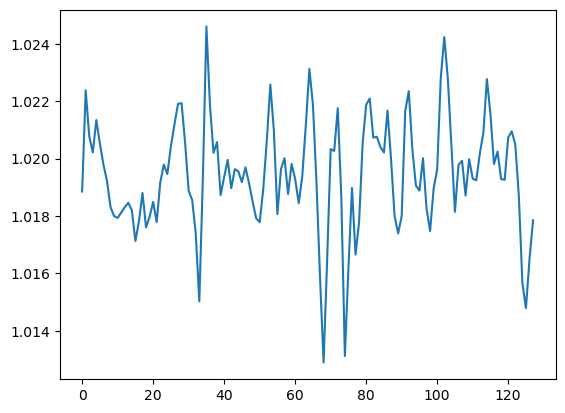

In [22]:
def load_file(filepath):
	dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

test = load_file("HARDataset/train/Inertial Signals/total_acc_x_train.txt")
print("shape of test: ")
print(test.shape)
plt.figure()
plt.plot(test[1])
plt.show


def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	loaded = np.dstack(loaded)
	return loaded



(7352, 128, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

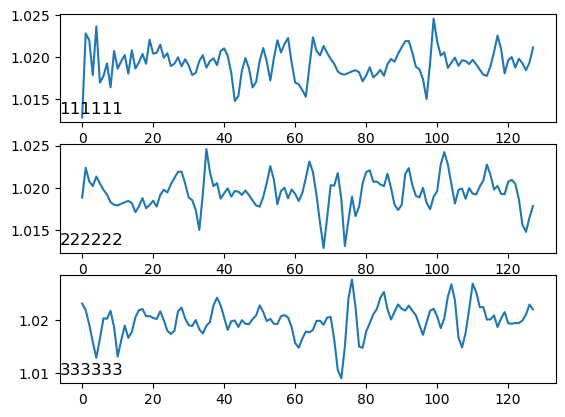

In [11]:
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	loaded = np.dstack(loaded)
	return loaded
test = load_group(["total_acc_x_train.txt","total_acc_y_train.txt","total_acc_z_train.txt"], "HARDataset/train/Inertial Signals/")
print(test.shape)
n, off = 3 ,0

plt.figure()
plt.subplot(n,1,1)
plt.plot(test[0,:,0])
plt.title("111111", y=0, loc='left')

plt.subplot(n,1,2)
plt.plot(test[1,:,0])
plt.title("222222", y=0, loc='left')

plt.subplot(n,1,3)
plt.plot(test[2,:,0])

plt.title("333333", y=0, loc='left')
plt.show

In [17]:
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	filenames = list()
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	X = load_group(filenames, filepath)
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

In [18]:
def data_for_subject(X, y, sub_map, sub_id):
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	return X[ix, :, :], y[ix]

def to_series(windows):
	series = list()
	for window in windows:
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

In [20]:
def plot_subject(X, y):
	plt.figure()
	
	n, off = X.shape[2] + 1, 0

	for i in range(3):
		plt.subplot(n, 1, off+1)
		plt.plot(to_series(X[:, :, off]))
		plt.title('total acc '+str(i), y=0, loc='left')
		off += 1

	for i in range(3):
		plt.subplot(n, 1, off+1)
		plt.plot(to_series(X[:, :, off]))
		plt.title('body acc '+str(i), y=0, loc='left')
		off += 1

	for i in range(3):
		plt.subplot(n, 1, off+1)
		plt.plot(to_series(X[:, :, off]))
		plt.title('body gyro '+str(i), y=0, loc='left')
		off += 1

	plt.subplot(n, 1, n)
	plt.plot(y)
	plt.title('activity', y=0, loc='left')
	plt.show()

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


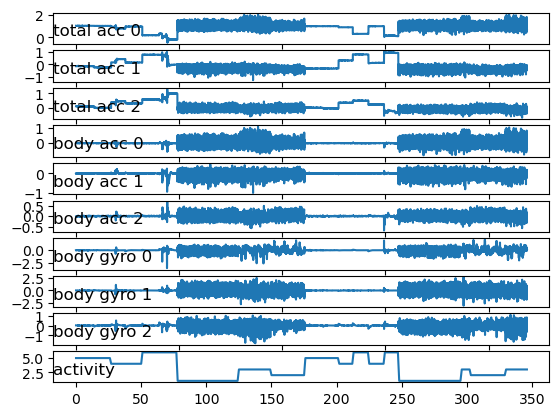

In [21]:
trainX, trainy = load_dataset('train', 'HARDataset/')
sub_map = load_file('HARDataset/train/subject_train.txt')
train_subjects = np.unique(sub_map)
print(train_subjects)

sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
plot_subject(subX, suby)